<a href="https://colab.research.google.com/github/kokchun/Databehandling-AI22/blob/main/Lectures/L4.1-api-stocks.ipynb" target="_parent"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a> &nbsp; for interacting with the code


---
# Lecture notes - Stockdata 1 - API
---

This is a lecture note on stock data from API - but it's built upon contents from pandas and previous course:

- Python programming

<p class = "alert alert-info" role="alert"><b>Note</b> that this lecture note gives a brief introduction to merging. I encourage you to read further about API.

Read more

- [video - API-key .env](https://www.youtube.com/watch?v=YdgIWTYQ69A)
- [wikipedia - REST API theory](https://en.wikipedia.org/wiki/Representational_state_transfer)
- [video - Python - requests](https://www.youtube.com/watch?v=tb8gHvYlCFs)
- [w3schools - requests](https://www.w3schools.com/python/module_requests.asp)

---


## Stocks API

Go into [Alpha Vantage](https://www.alphavantage.co/documentation/) and read the documentation of the time series APIs

- Go into [claim API key](https://www.alphavantage.co/support/#api-key) and fill in the form to claim your free API-key

- You will be using the API key to access stock data

- Create a file called .env and type:

```py
ALPHA_API_KEY = ...
```

- the dots should be your API key
- go into your .gitignore file in your repo and make sure that there is .env there so that you don't push the .env file to a public Github repo where anyone can access your key and do stuffs in your name

**Setup**

- pipenv install python-dotenv

[Symbols of stocks](https://www.nasdaq.com/market-activity/stocks/screener) that is useful for get-request


In [6]:
import os
from dotenv import load_dotenv
import requests
import pandas as pd

load_dotenv()
api_key = os.getenv("ALPHA_API_KEY")
# NOTE: you can print it for your own validation, but remove the print before pushing to Github

symbols = ["AAPL", "NVDA", "TSLA", "IBM"]
stock_list = []

for symbol in symbols:
    function = "TIME_SERIES_INTRADAY"

    url = f'https://www.alphavantage.co/query?function={function}&symbol={symbol}&interval=5min&apikey={api_key}'
    #url = f'https://www.alphavantage.co/query?function={function}&symbol={symbol}&apikey={api_key}'
    data = requests.get(url).json()
    df = pd.DataFrame(data["Time Series (5min)"]).transpose()
    df = df["4. close"].rename(symbol).astype(float)
    stock_list.append(df)


In [7]:
stock_list

[2022-11-04 20:00:00    138.1200
 2022-11-04 19:55:00    138.0700
 2022-11-04 19:50:00    138.1200
 2022-11-04 19:45:00    138.1200
 2022-11-04 19:40:00    138.1700
                          ...   
 2022-11-04 12:05:00    134.8800
 2022-11-04 12:00:00    135.0300
 2022-11-04 11:55:00    135.1100
 2022-11-04 11:50:00    135.4783
 2022-11-04 11:45:00    135.9000
 Name: AAPL, Length: 100, dtype: float64,
 2022-11-04 20:00:00    141.7500
 2022-11-04 19:55:00    141.7500
 2022-11-04 19:50:00    141.7600
 2022-11-04 19:45:00    141.6400
 2022-11-04 19:40:00    141.6500
                          ...   
 2022-11-04 11:55:00    138.4900
 2022-11-04 11:50:00    139.0200
 2022-11-04 11:45:00    139.5600
 2022-11-04 11:40:00    140.0707
 2022-11-04 11:35:00    140.4700
 Name: NVDA, Length: 100, dtype: float64,
 2022-11-04 20:00:00    209.0500
 2022-11-04 19:55:00    209.0000
 2022-11-04 19:50:00    208.6600
 2022-11-04 19:45:00    208.6500
 2022-11-04 19:40:00    208.5000
                         

In [8]:
# concatenate the list of series to a df
stocks = pd.concat(stock_list, axis=1)
stocks


,AAPL,NVDA,TSLA,IBM
2022-11-04 20:00:00,138.12,141.75,209.05,NaN
2022-11-04 19:55:00,138.07,141.75,209.00,NaN
2022-11-04 19:50:00,138.12,141.76,208.66,NaN
2022-11-04 19:45:00,138.12,141.64,208.65,137.00
2022-11-04 19:40:00,138.17,141.65,208.50,NaN
...,...,...,...,...
2022-11-04 08:20:00,NaN,NaN,NaN,135.09
2022-11-04 08:05:00,NaN,NaN,NaN,135.66
2022-11-04 08:00:00,NaN,NaN,NaN,135.50
2022-11-04 07:10:00,NaN,NaN,NaN,135.21


In [9]:
import plotly_express as px

# initial plot
px.line(stocks, x=stocks.index, y=[
        "AAPL", "NVDA", "TSLA", "IBM"],
        labels={"variable": "Stock", "index": "Year", "value": "Value $"},
        title="Some stocks", log_y=True)


---
## Working with time series


In [10]:
print(stocks.index.dtype)
# type cast index from object to datetime
stocks.index = pd.to_datetime(stocks.index)
print(stocks.index.dtype)
stocks.head()


object
datetime64[ns]


,AAPL,NVDA,TSLA,IBM
2022-11-04 20:00:00,138.12,141.75,209.05,NaN
2022-11-04 19:55:00,138.07,141.75,209.00,NaN
2022-11-04 19:50:00,138.12,141.76,208.66,NaN
2022-11-04 19:45:00,138.12,141.64,208.65,137.0
2022-11-04 19:40:00,138.17,141.65,208.50,NaN


In [18]:
stocks.loc["2022-11-04 20:00:00"]  # gives all data where year is 2020


AAPL    138.12
NVDA    141.75
TSLA    209.05
IBM        NaN
Name: 2022-11-04 20:00:00, dtype: float64

In [26]:
stocks.sort_index().loc["2022-11-03":"2022-11-04"]  # gives all rows between these times


,AAPL,NVDA,TSLA,IBM
2022-11-03 19:55:00,NaN,NaN,NaN,134.36
2022-11-04 07:10:00,NaN,NaN,NaN,135.21
2022-11-04 08:00:00,NaN,NaN,NaN,135.50
2022-11-04 08:05:00,NaN,NaN,NaN,135.66
2022-11-04 08:20:00,NaN,NaN,NaN,135.09
...,...,...,...,...
2022-11-04 19:40:00,138.17,141.65,208.50,NaN
2022-11-04 19:45:00,138.12,141.64,208.65,137.00
2022-11-04 19:50:00,138.12,141.76,208.66,NaN
2022-11-04 19:55:00,138.07,141.75,209.00,NaN


---
## Plot 4 stocks in subplots


array([[<AxesSubplot: >, <AxesSubplot: >],
       [<AxesSubplot: >, <AxesSubplot: >]], dtype=object)
array([<AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >],
      dtype=object)


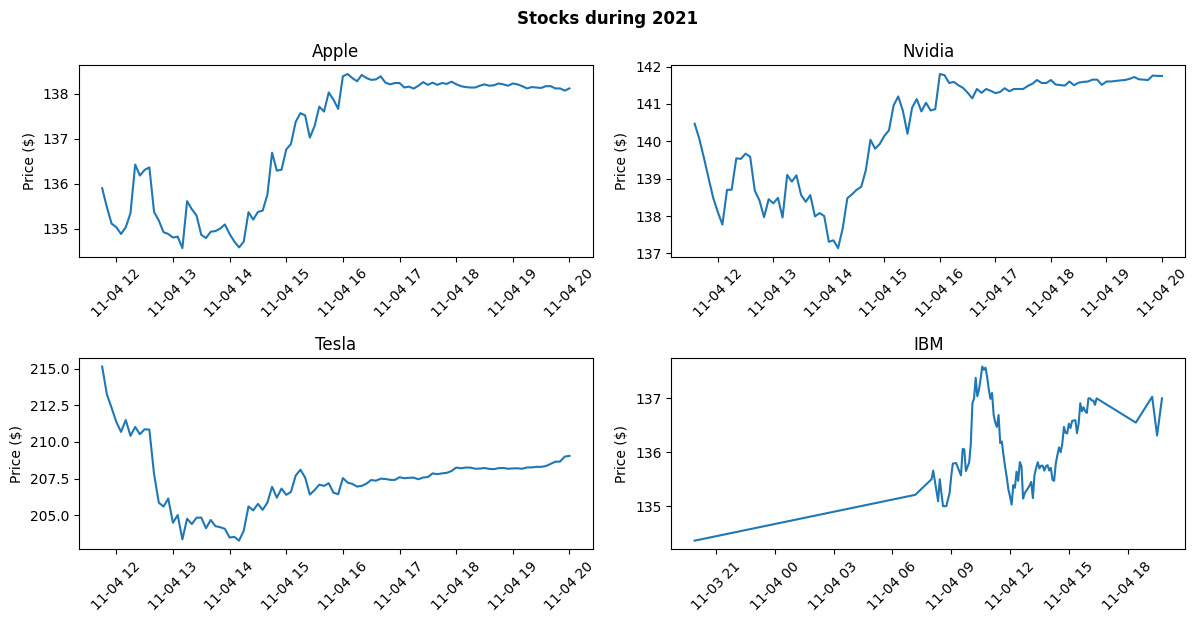

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 2, dpi=100, figsize=(12,6))

# 2D array -> 2D array has a method flatten() to create a numpy flattened array
print(repr(axes))
print(repr(axes.flatten()))

stock_names = {"AAPL": "Apple", "NVDA": "Nvidia",
               "TSLA": "Tesla", "IBM": "IBM"}

stocks_2022 = stocks.loc["2022"]

for ax, symbol in zip(axes.flatten(), stock_names):
    sns.lineplot(data=stocks_2022, x=stocks_2022.index, y=symbol, ax=ax)
    ax.tick_params(axis="x", rotation=45)
    ax.set(title=f"{stock_names[symbol]}", ylabel="Price ($)")
    #ax.grid()

fig.tight_layout()
fig.suptitle("Stocks during 2021", y=1.03, fontweight="bold");

---
## Download csv

In [17]:
import time

symbols = ["AAPL", "NVDA", "TSLA", "IBM"]
stock_list = []

for symbol in symbols:
    for function, time_column in zip(["TIME_SERIES_DAILY", "TIME_SERIES_INTRADAY_EXTENDED"], ["timestamp", "time"]):
        url = f"https://www.alphavantage.co/query?function={function}&symbol={symbol}&apikey={api_key}&datatype=csv&outputsize=full&interval=60min"

        df = pd.read_csv(url)
        df.set_index(df[time_column], inplace=True)
        df.index = pd.to_datetime(df.index)
        df.drop(time_column, axis=1, inplace=True)
        df.to_csv(f"../Data/Stocksdata/{symbol}_{function}.csv")

        # to not overload API
        time.sleep(15)

---

Kokchun Giang

[LinkedIn][linkedIn_kokchun]

[GitHub portfolio][github_portfolio]

[linkedIn_kokchun]: https://www.linkedin.com/in/kokchungiang/
[github_portfolio]: https://github.com/kokchun/Portfolio-Kokchun-Giang

---
